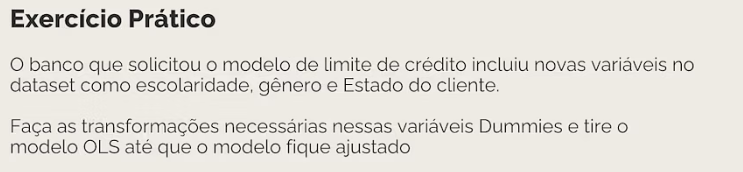

In [4]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
#Importe o arquivo formato xlsx
df_limite = pd.read_excel(r"C:\Users\alexa\OneDrive\Área de Trabalho\repositorios_git\DNC_repository\exe_regressao_linear_multipla\limite_dummy.xlsx")
df_limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [8]:
df_limite.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'Escolaridade', 'Região', 'Gênero', 'LimitedoChequeEspecial'],
      dtype='object')

In [9]:
df_limite = pd.get_dummies(df_limite, prefix=['Escolaridade', 'Região', 'Gênero'])


In [10]:
df_limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Região_RJ,Região_SP,Gênero_F,Gênero_M
0,70,10736,5214,400,500,1,0,1,0,1,0
1,68,5000,5000,380,600,1,0,1,0,1,0
2,44,5800,5800,500,800,1,0,1,0,1,0
3,72,4300,4300,2000,1000,1,0,1,0,1,0
4,75,4400,4400,3000,1000,1,0,1,0,1,0


In [11]:
df_limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Região_RJ,Região_SP,Gênero_F,Gênero_M
Idade,1.000000,0.239445,0.213186,0.057183,0.228117,-0.150088,0.150088,-0.196052,0.196052,-0.121217,0.121217
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191,-0.177798,0.177798,-0.406241,0.406241
Salario,0.213186,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479,-0.242621,0.242621,-0.424335,0.424335
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433,-0.001145,0.001145,-0.473326,0.473326
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310,-0.312566,0.312566,-0.591779,0.591779
Escolaridade_Fundamental_Medio,-0.150088,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000,0.237508,-0.237508,0.602464,-0.602464
Escolaridade_Superior_Pos,0.150088,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000,-0.237508,0.237508,-0.602464,0.602464
Região_RJ,-0.196052,-0.177798,-0.242621,-0.001145,-0.312566,0.237508,-0.237508,1.000000,-1.000000,-0.167248,0.167248
Região_SP,0.196052,0.177798,0.242621,0.001145,0.312566,-0.237508,0.237508,-1.000000,1.000000,0.167248,-0.167248
Gênero_F,-0.121217,-0.406241,-0.424335,-0.473326,-0.591779,0.602464,-0.602464,-0.167248,0.167248,1.000000,-1.000000


In [12]:
import statsmodels.formula.api as smf

In [29]:
#modelo MRLS
function = 'LimitedoChequeEspecial~LimitedeCreditoImediato+Idade+RendimentoTotal+Salario+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           7.44e-17
Time:                            21:58:08   Log-Likelihood:                -434.21
No. Observations:                      48   AIC:                             884.4
Df Residuals:                          40   BIC:                             899.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [30]:
# retirando Idade por ser o maior -value
function = 'LimitedoChequeEspecial~LimitedeCreditoImediato+RendimentoTotal+Salario+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           9.97e-18
Time:                            21:58:56   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [31]:
# retirando LimitedeCreditoImediato   por ser o maior -value
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           1.39e-18
Time:                            21:59:35   Log-Likelihood:                -434.44
No. Observations:                      48   AIC:                             880.9
Df Residuals:                          42   BIC:                             892.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [32]:
# retirando Escolaridade_Fundamental_Medio por ser o maior -value
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade_Superior_Pos+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           1.39e-18
Time:                            22:00:03   Log-Likelihood:                -434.44
No. Observations:                      48   AIC:                             880.9
Df Residuals:                          42   BIC:                             892.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [33]:
# retirando Escolaridade_Superior_Pos por ser o maior -value
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           2.02e-19
Time:                            22:00:29   Log-Likelihood:                -434.83
No. Observations:                      48   AIC:                             879.7
Df Residuals:                          43   BIC:                             889.0
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [34]:
# retirando RendimentoTotal por ser o maior -value
function = 'LimitedoChequeEspecial~Salario+Região_RJ+Região_SP+Gênero_F+Gênero_M'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           3.24e-20
Time:                            22:00:49   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [35]:
# retirando Intercept por ser o maior -value
function = 'LimitedoChequeEspecial~Salario+Região_RJ+Região_SP+Gênero_F+Gênero_M -1'
model = smf.ols(formula=function, data=df_limite).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Mon, 10 Jun 2024   Prob (F-statistic):           3.24e-20
Time:                            22:01:12   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salario     